# Data Exploration & Cleaning 

In [1]:
# Importing the requires libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Loading the dataset
df = pd.read_csv('last3.csv')
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

Meta Data About Dataset ID numerical Integer Shows a unique identificator of a customer.

Sex categorical {0,1} Biological sex (gender) of a customer. In this dataset there are only 2 different options. 0 male 1 female

Marital status categorical {0,1} Marital status of a customer. 0 single 1 non-single (divorced / separated / married / widowed)

Age numerical Integer The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset 18 Min value (the lowest age observed in the dataset) 76 Max value (the highest age observed in the dataset)

Education categorical {0,1,2,3} Level of education of the customer 0 other / unknown 1 high school 2 university 3 graduate school

Income numerical Real Self-reported annual income in US dollars of the customer. 35832 Min value (the lowest income observed in the dataset) 309364 Max value (the highest income observed in the dataset)

Occupation categorical {0,1,2} Category of occupation of the customer. 0 unemployed / unskilled 1 skilled employee / official 2 management / self-employed / highly qualified employee / officer

Settlement size categorical {0,1,2} The size of the city that the customer lives in. 0 small city 1 mid-sized city 2 big city

In [3]:
# Renaming the column settlement to city size
df = df.rename(columns = {'Settlement size' : 'City size'})

In [4]:
# Removing ID column from dataset
df.drop('ID', axis=1, inplace=True)

In [5]:
# Letting know our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             2000 non-null   int64
 1   Marital status  2000 non-null   int64
 2   Age             2000 non-null   int64
 3   Education       2000 non-null   int64
 4   Income          2000 non-null   int64
 5   Occupation      2000 non-null   int64
 6   City size       2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [6]:
# Defining categorical columns 
cat_columns = ['Sex','Marital status','Education','Occupation','City size']
df[cat_columns] = df[cat_columns].astype('str')

# Stadistical information of categorical columns  
df.describe(include="object")

Sex Marital status Education Occupation City size
count   2000           2000      2000       2000      2000
unique     2              2         4          3         3
top        0              0         1          1         0
freq    1086           1007      1386       1113       989

In [7]:
# Stadistical information of numeric columns 
num_cols = df[['Age','Income']]
num_cols.describe().round()

Age    Income
count  2000.0    2000.0
mean     36.0  120954.0
std      12.0   38109.0
min      18.0   35832.0
25%      27.0   97663.0
50%      33.0  115548.0
75%      42.0  138072.0
max      76.0  309364.0

# Exploratory Analysis 



### Histograms 
Analyzing the distribution of age and income of the dataset

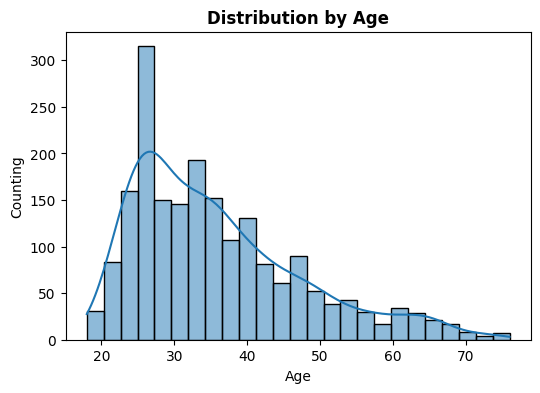

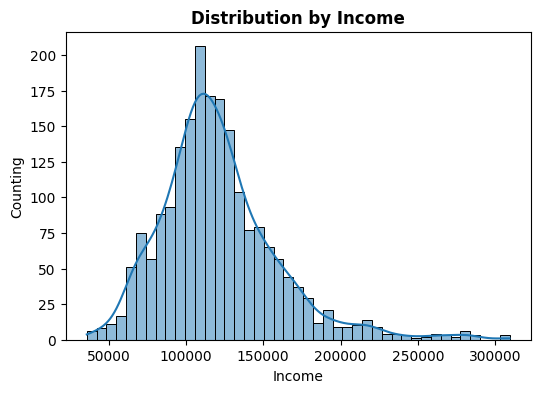

In [16]:
# Analyzing the numeric columns
for num_col in num_cols:
    plt.subplots(figsize=(6, 4))
    sns.histplot(df, x=num_col, kde=True)
    plt.title('Distribution by ' + num_col, loc='center', fontweight='bold')
    plt.ylabel('Counting')
    plt.show()

In [18]:
visual = pd.read_csv("last3.csv")
visual.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

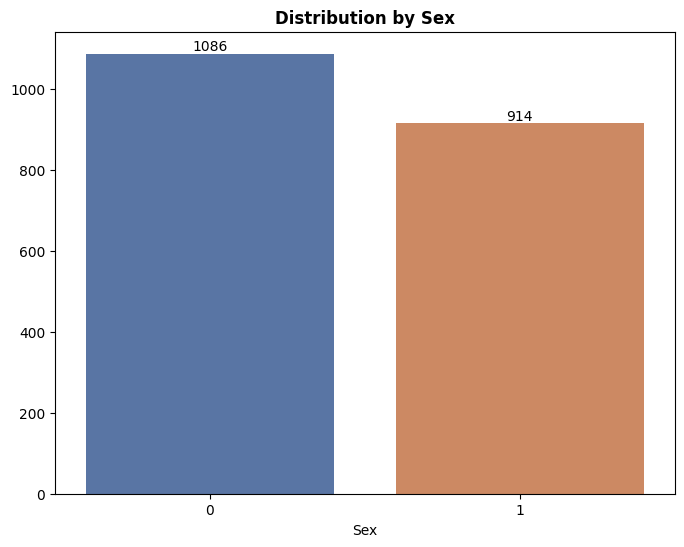

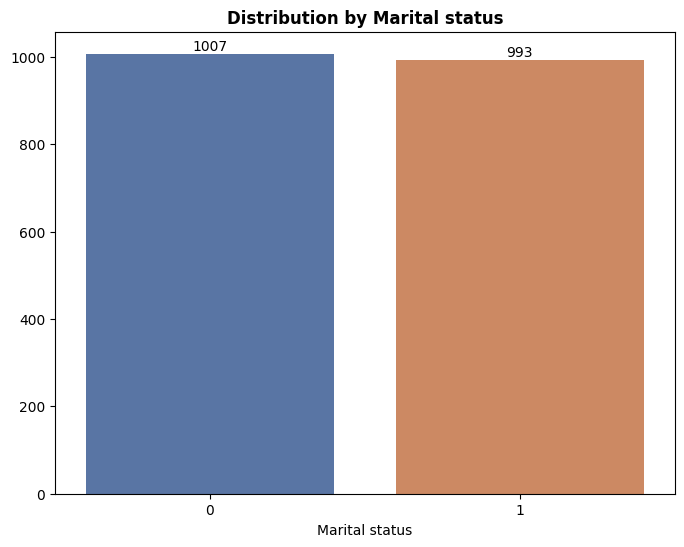

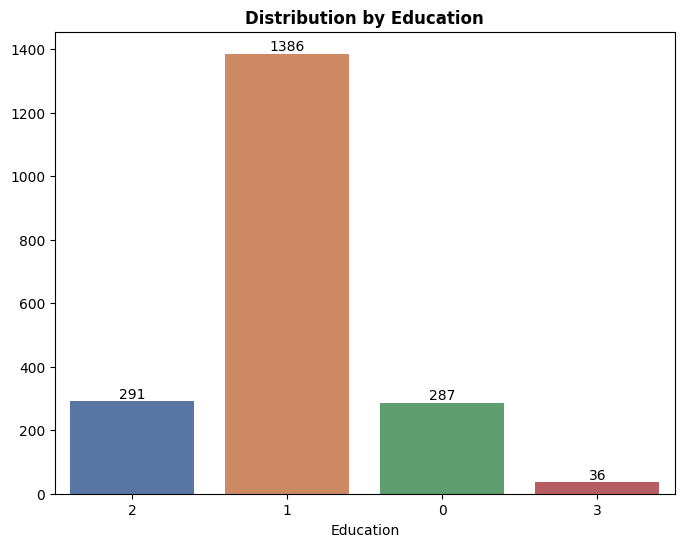

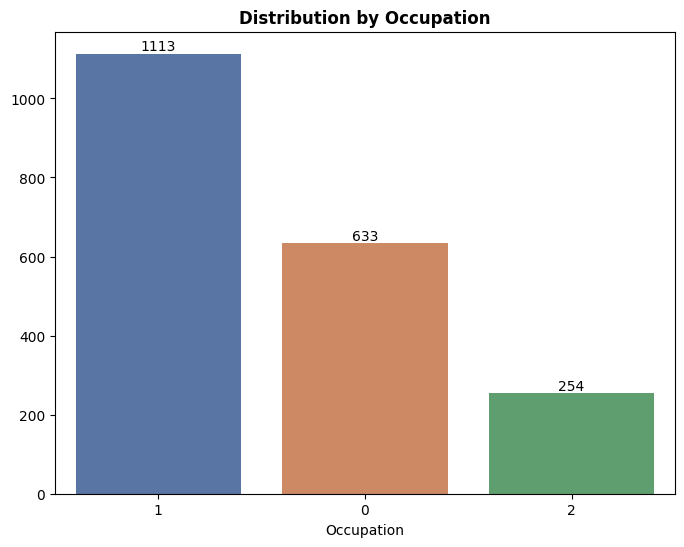

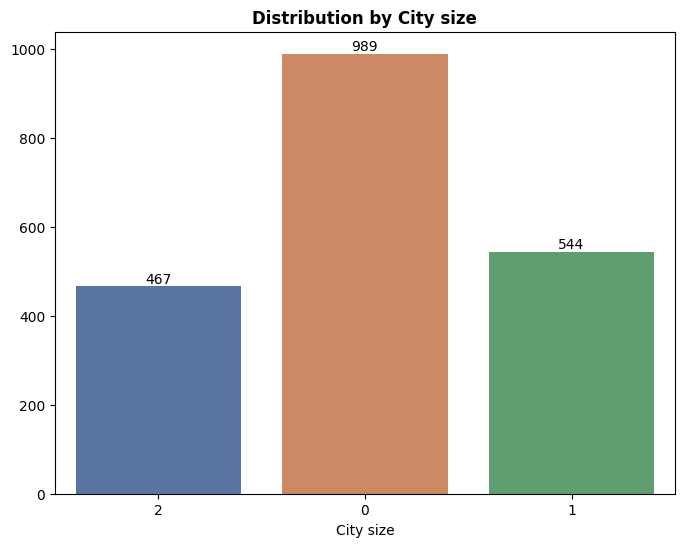

In [10]:
# Creating bar chart for every categorical column 
for cat_col in cat_columns:
    plt.subplots(figsize=(8, 6))
    ax = sns.countplot(data=df, x=cat_col, palette='deep')  
    plt.title('Distribution by ' + cat_col, fontweight='bold')
    plt.ylabel(None)
    ax.bar_label(ax.containers[0])

# Remplacing number by the meaning
    if cat_col == 'Sex':
        df['Sex'].replace({'0': 'Male', '1': 'Female'}, inplace=True)
        
    elif cat_col == 'Marital status':
        df['Marital status'].replace({'0':'Single', '1':'Non-Single'}, inplace=True)
        
    elif cat_col == 'Education':
        df['Education'].replace({'0':'Other', '1':'High School', '2':'University', '3':'Graduate School'}, inplace=True)
        
    elif cat_col == 'Occupation':
        df['Occupation'].replace({'0':'Unemployed', '1':'Skilled Employee', '2':'High qualified Employee'}, inplace=True)
        
    elif cat_col == 'City size':
        df['City size'].replace({'0':'Small', '1':'Medium', '2':'Big'}, inplace=True)
        
    plt.show()

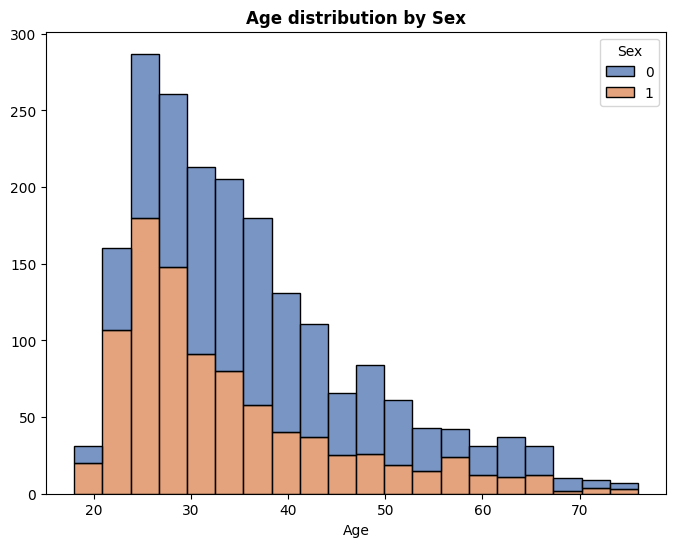

In [19]:
# Comparing age distribution by Sex
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Sex',bins=20, multiple='stack', palette='deep')
plt.title('Age distribution by Sex', fontweight='bold')
plt.ylabel(None)
plt.show()

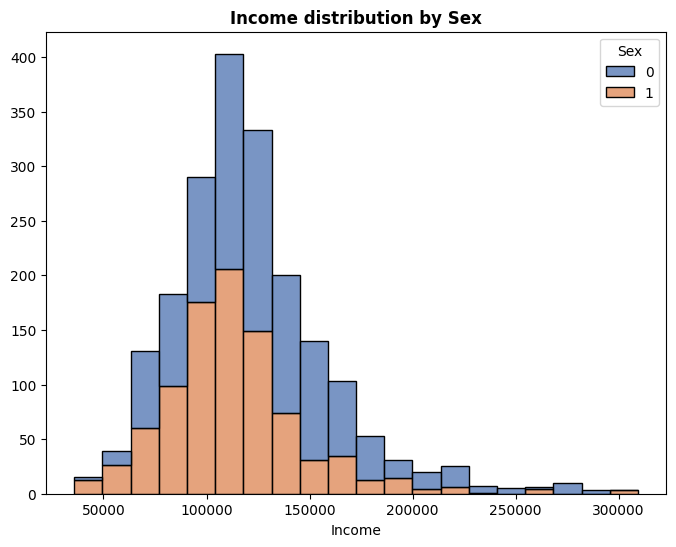

In [20]:
# Comparing income distribution by Sex 
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Income', hue='Sex',bins=20, multiple='stack', palette='deep')
plt.title('Income distribution by Sex', fontweight='bold')
plt.ylabel(None)
plt.show()

Men in the dataset tend to have higher salaries compared to women.

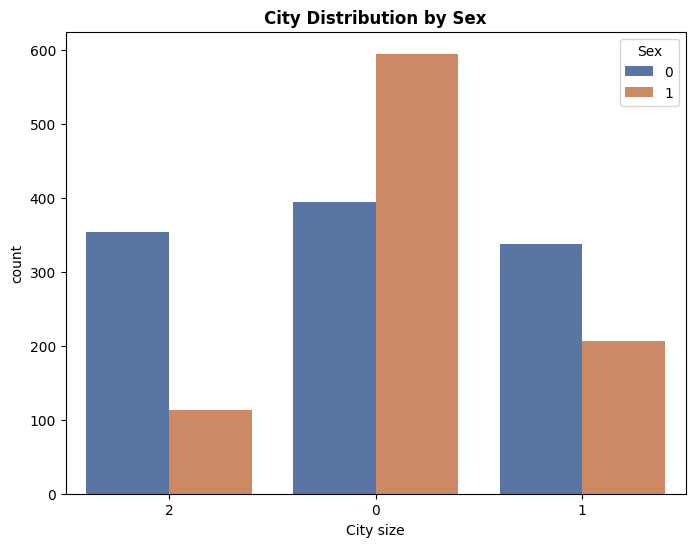

In [21]:
# City distribution by sex 
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='City size', hue='Sex', palette='deep')
plt.title('City Distribution by Sex', fontweight='bold')
plt.show()

Men dominate in both big and medium-sized cities, whereas women are more prevalent in small cities.

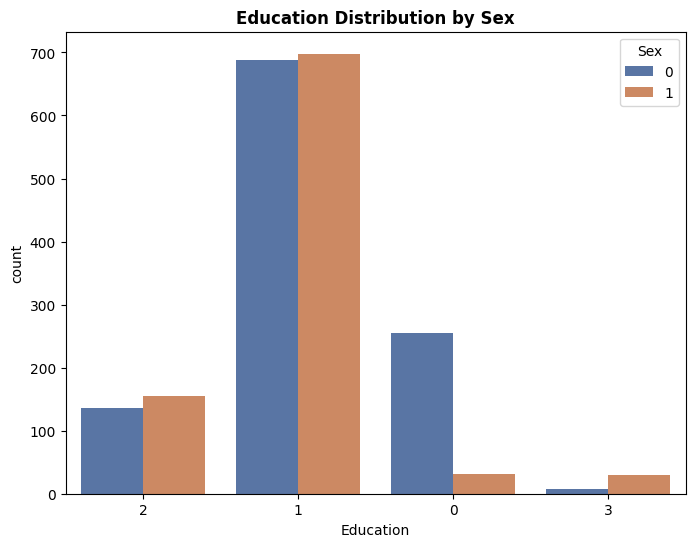

In [22]:
# Education distribution by sex 
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Education', hue='Sex', palette='deep')
plt.title('Education Distribution by Sex', fontweight='bold')
plt.show()

Among women, a higher percentage holds educational qualifications ranging from high school to graduate school. In contrast, men exhibit a diverse range of educational backgrounds.

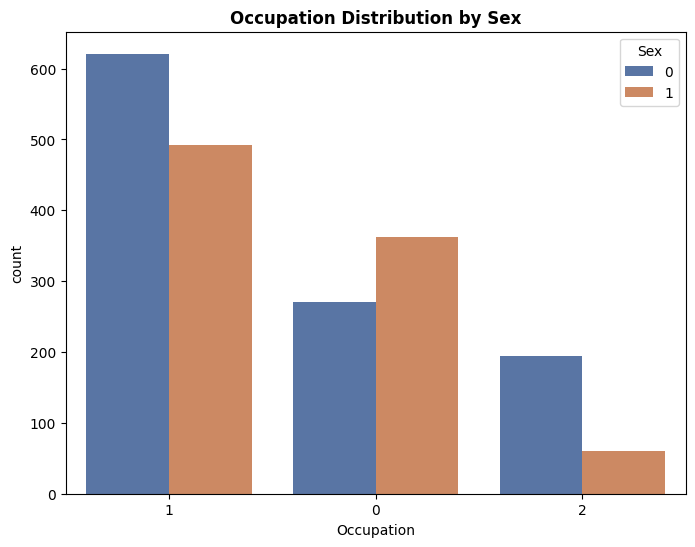

In [9]:
# Occupation distribution by sex 
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Occupation', hue='Sex', palette='deep')
plt.title('Occupation Distribution by Sex', fontweight='bold')
plt.show()

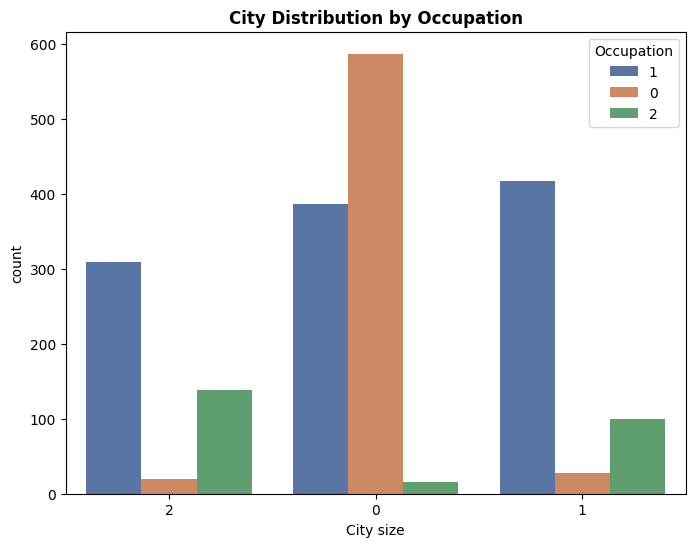

In [24]:
# Distribution of city by Occupation
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='City size', hue='Occupation', palette='deep')
plt.title('City Distribution by Occupation', fontweight='bold')
plt.show()

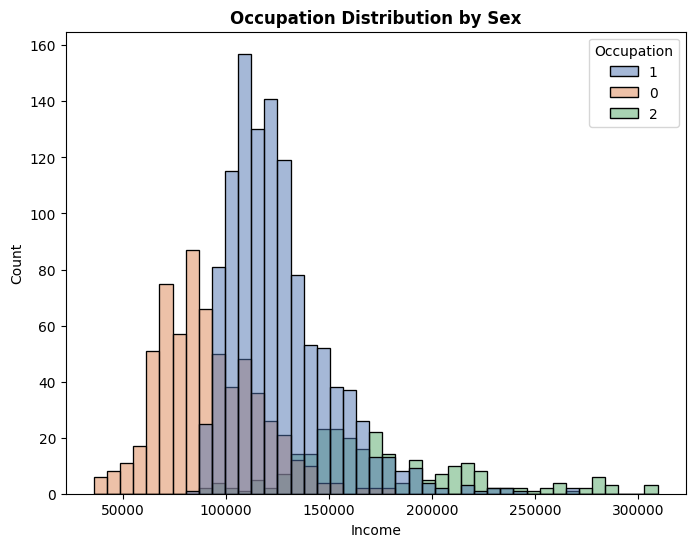

In [25]:
# Distribution of income by Occupation
plt.figure(figsize=(8,6))
ax = sns.histplot(data=df, x='Income',  hue='Occupation', palette='deep')
plt.title('Occupation Distribution by Sex', fontweight='bold')
plt.show()

The histogram provides a clear visual representation of income distribution. Individuals in the unemployed category, representing various job types, generally have the lowest salaries, often below 50k. On the other hand, skilled employees tend to earn salaries ranging from 100k to approximately 150k. Notably, those in high-qualified positions enjoy a higher income bracket, typically ranging from 150k to even 300k.

# Customer Clustering

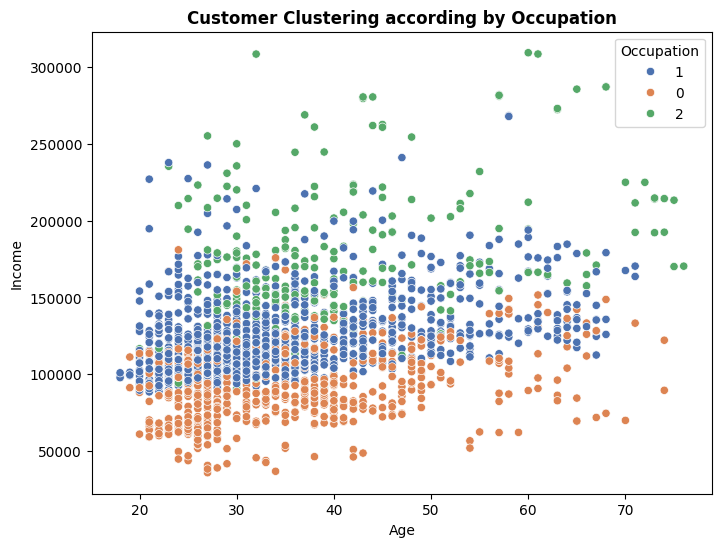

In [26]:
# Scatterplot according by age, income and grouped by Occupation
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df, y='Income', x='Age', hue='Occupation', palette='deep')
plt.title('Customer Clustering according by Occupation', fontweight='bold')
plt.show()

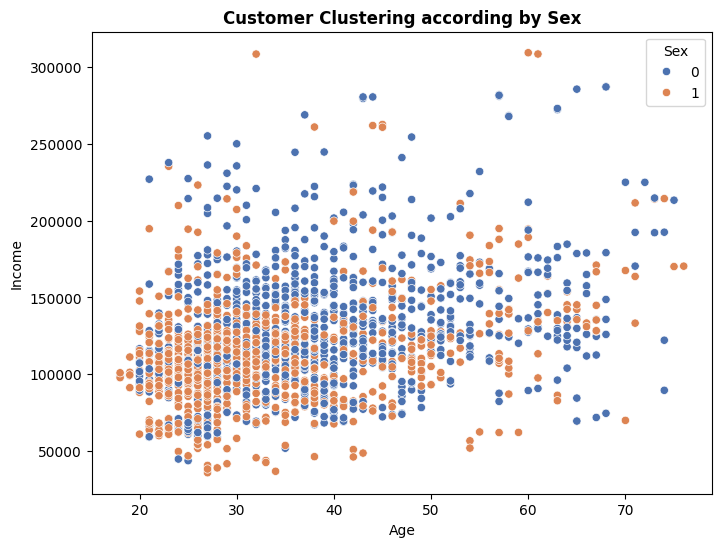

In [27]:
# Scatterplot according by age, income and grouped by Occupation
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df, y='Income', x='Age', hue='Sex', palette='deep')
plt.title('Customer Clustering according by Sex', fontweight='bold')
plt.show()

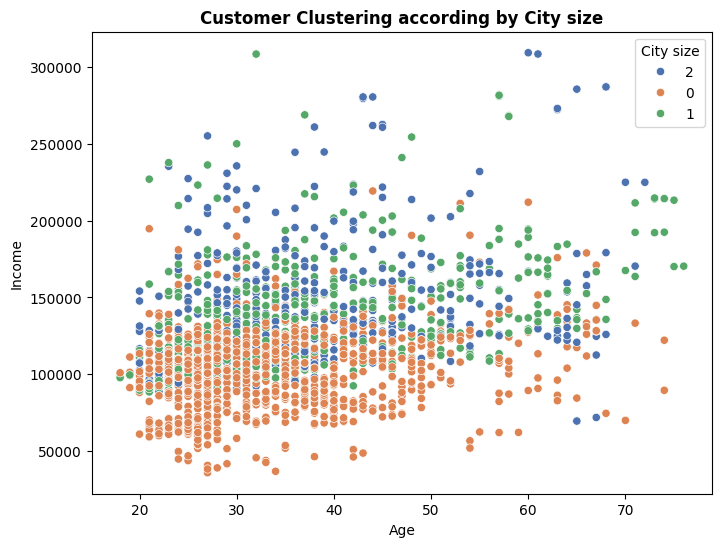

In [28]:
# Scatterplot according by age, income and grouped by City Size
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df, y='Income', x='Age', hue='City size', palette='deep')
plt.title('Customer Clustering according by City size', fontweight='bold')
plt.show()

In [31]:
final_data = df.drop(columns = ['Sex','Marital status','Education','Occupation','City size'])
final_data.head()

Age    Income
0  2.653614  0.097524
1 -1.187132  0.782654
2  1.117316 -0.833202
3  0.775916  1.328386
4  1.458716  0.736932

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, SpectralClustering, MiniBatchKMeans

# Initialize clustering models
models = [
    KMeans(n_clusters=2, n_init=10),
    AgglomerativeClustering(n_clusters=2),
    DBSCAN(eps=0.5, min_samples=5),
    Birch(n_clusters=2),
    SpectralClustering(n_clusters=2),
    MiniBatchKMeans(n_clusters=2),
]

# Train and fit models
for model in models:
    model.fit(df)

# Evaluate models, e.g., silhouette score for KMeans
from sklearn.metrics import silhouette_score



A:\Python\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
A:\Python\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
A:\Python\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
A:\Python\Lib\site-packages\sklearn\metrics\pairwise.py:380: RuntimeWarning: invalid value encountered in add
  distances += XX
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:690: RuntimeWarning: overflow encountered in square
  lloyd_iter(
A:\Python\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value 

In [18]:
from sklearn.metrics import calinski_harabasz_score

for i, model in enumerate(models):
    labels = model.labels_
    score = calinski_harabasz_score(df, labels)
    print(f"Model {i+1}: Calinski-Harabasz Index = {score}")



Model 1: Calinski-Harabasz Index = 2777.7048140984407
Model 2: Calinski-Harabasz Index = 2753.4274285937236


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [19]:
for i, model in enumerate(models):
    labels = model.labels_
    print(f"Model {i+1}: Unique Labels = {set(labels)}")


Model 1: Unique Labels = {0, 1}
Model 2: Unique Labels = {0, 1}
Model 3: Unique Labels = {-1}
Model 4: Unique Labels = {0, 1}
Model 5: Unique Labels = {0}
Model 6: Unique Labels = {0, 1}


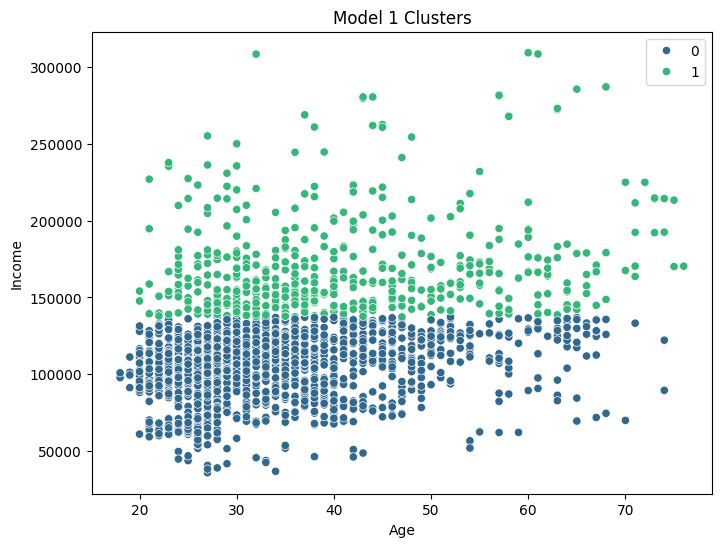

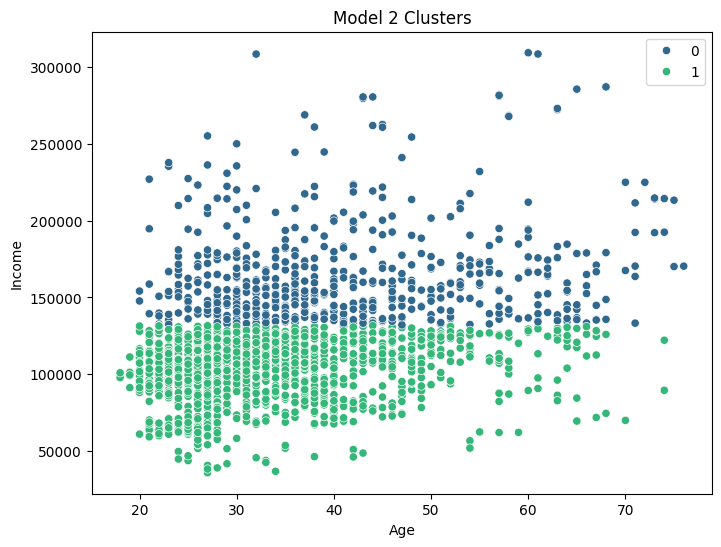

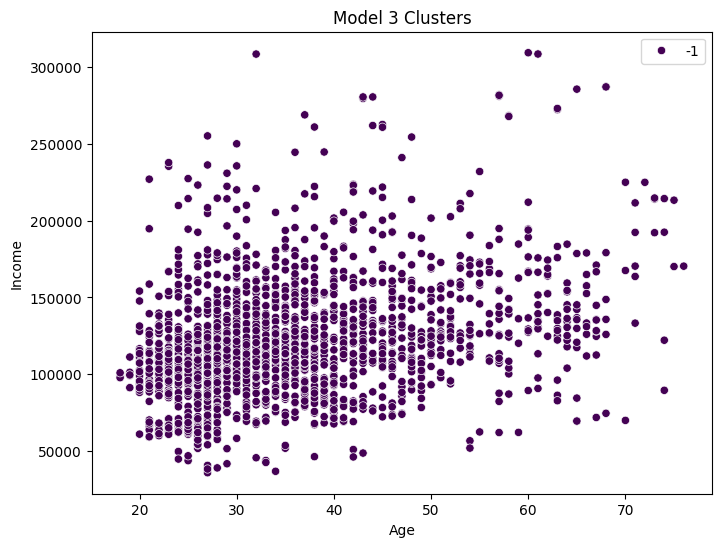

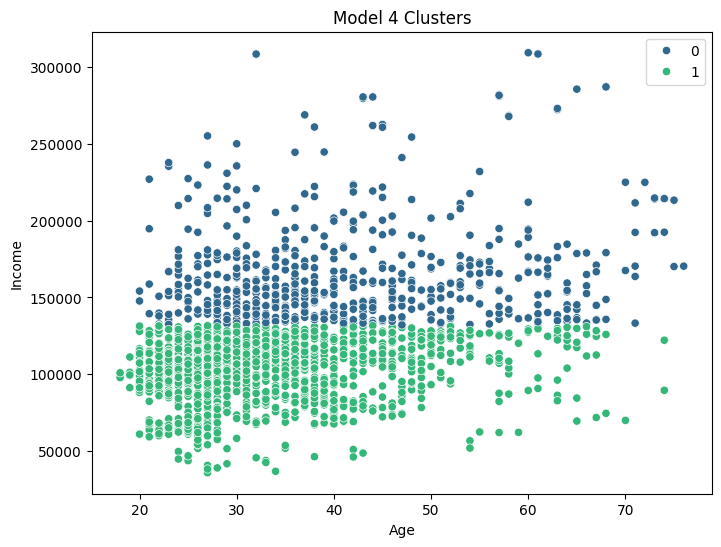

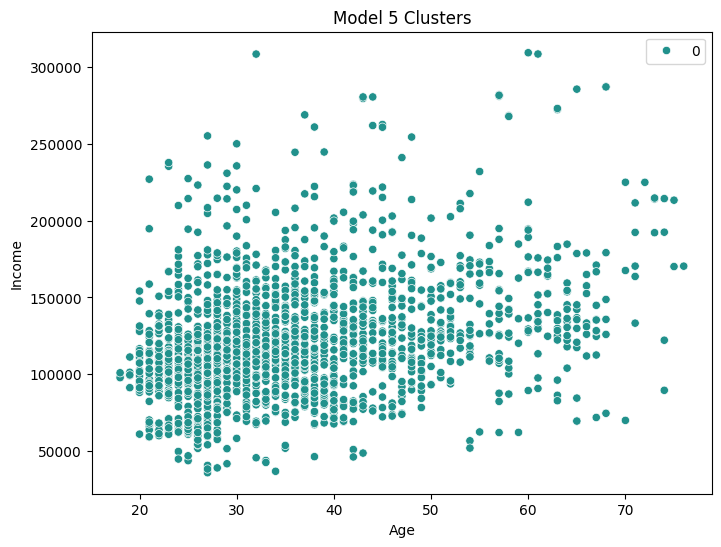

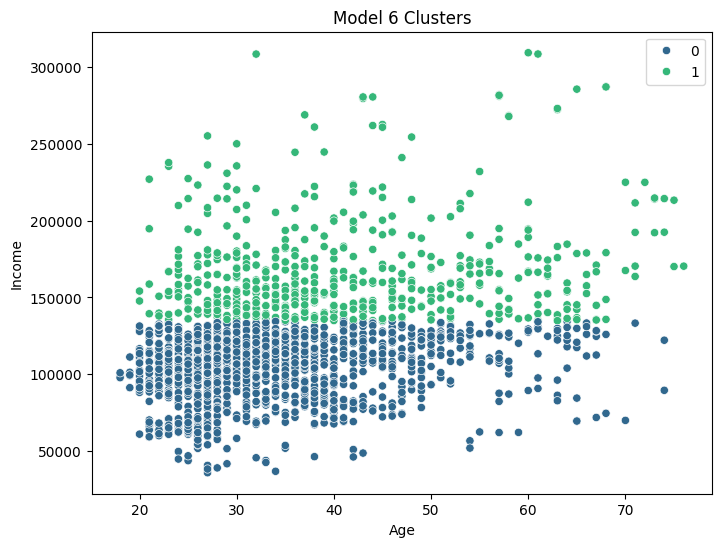

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, model in enumerate(models):
    labels = model.labels_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Age'], y=df['Income'], hue=labels, palette='viridis')
    plt.title(f"Model {i+1} Clusters")
    plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_clusters': [2, 3, 4, 5]}

# Initialize the clustering model
kmeans = KMeans()

# Perform GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(df)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

Best Parameters: {'n_clusters': 5}


In [36]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, SpectralClustering, MiniBatchKMeans

# Initialize clustering models
models = [
    KMeans(n_clusters=5, n_init=10),
    AgglomerativeClustering(n_clusters=5),
    DBSCAN(eps=0.5, min_samples=5),
    Birch(n_clusters=5),
    SpectralClustering(n_clusters=5),
    MiniBatchKMeans(n_clusters=5),
]

# Train and fit models
for model in models:
    model.fit(df)

# Evaluate models, e.g., silhouette score for KMeans
from sklearn.metrics import silhouette_score



A:\Python\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
A:\Python\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
A:\Python\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
A:\Python\Lib\site-packages\sklearn\metrics\pairwise.py:380: RuntimeWarning: invalid value encountered in add
  distances += XX
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:690: RuntimeWarning: overflow encountered in square
  lloyd_iter(
A:\Python\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value 

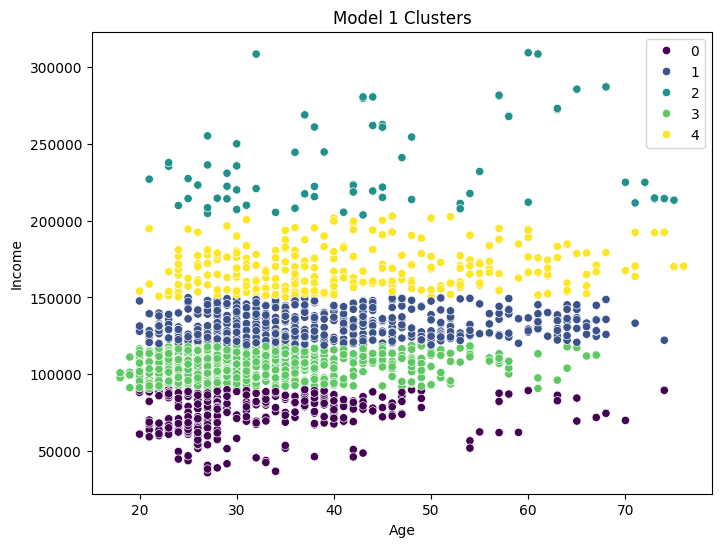

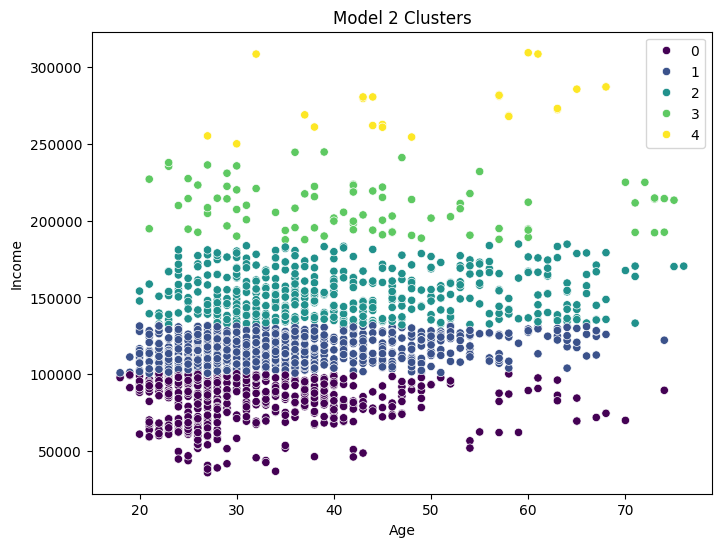

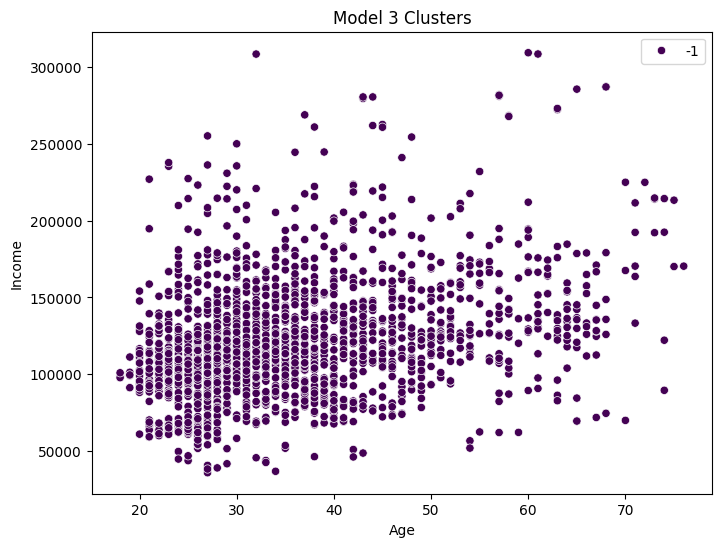

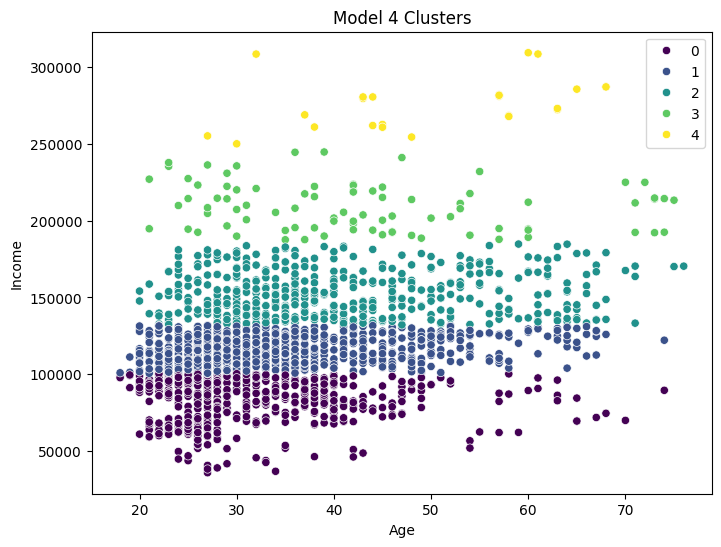

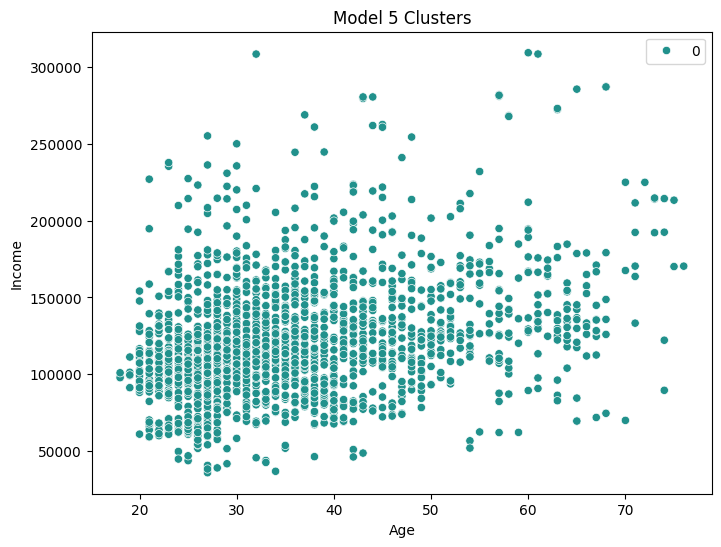

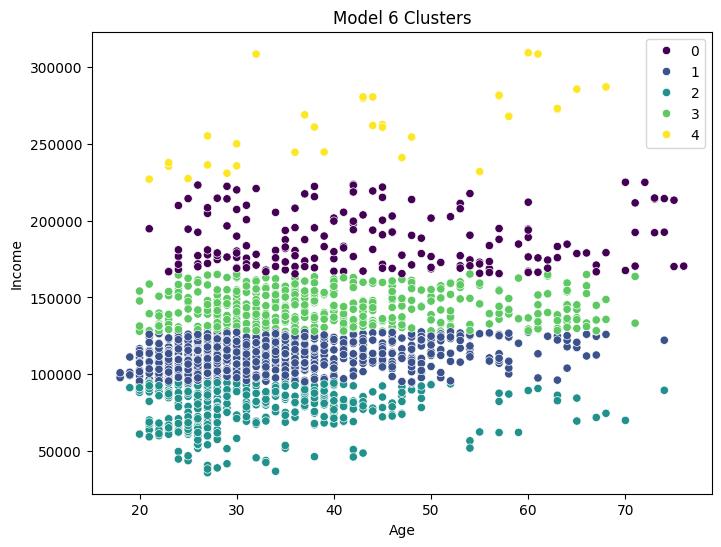

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, model in enumerate(models):
    labels = model.labels_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Age'], y=df['Income'], hue=labels, palette='viridis')
    plt.title(f"Model {i+1} Clusters")
    plt.show()


In [39]:
best_kmeans = grid_search.best_estimator_
labels = best_kmeans.labels_

# Evaluate the performance, e.g., silhouette score
score = silhouette_score(df, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5405920470153107


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Define the pipeline
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('clustering', best_kmeans)
])

# Fit the pipeline
pipeline.fit(df)

# Predict clusters
clusters = pipeline.predict(df)


A:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Model 1: Silhouette Score = 0.5401417522540799
[1 4 0 ... 0 3 0]


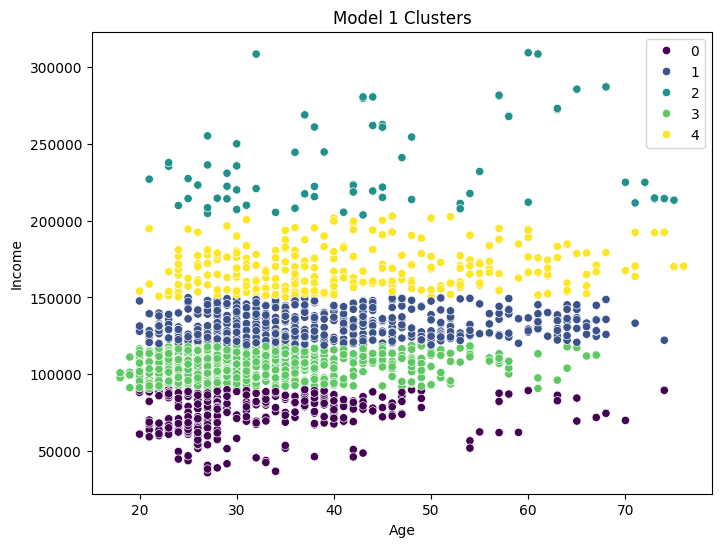

Model 2: Silhouette Score = 0.5298858015643996
[1 2 0 ... 0 0 0]


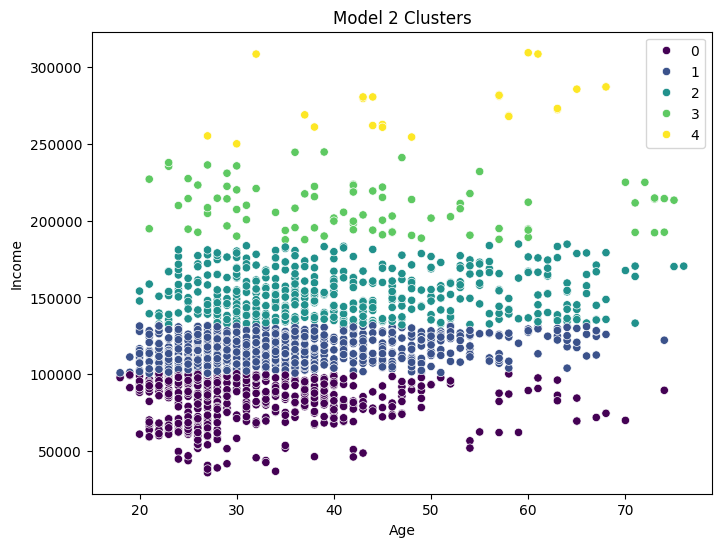

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [46]:
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed dataset
for i, model in enumerate(models):
    labels = model.labels_
    
    # Evaluate using silhouette score
    score = silhouette_score(df, labels)
    print(f"Model {i+1}: Silhouette Score = {score}")
    print (labels)
    # Visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Age'], y=df['Income'], hue=labels, palette='viridis')
    plt.title(f"Model {i+1} Clusters")
    plt.show()
